In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# Printing out the full paths of all files within the kaggle directory and its subdirectories.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# Importing the various libraries and modules required for the project

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout,Flatten, Lambda
from keras.layers import Conv2D, Activation,AveragePooling2D,MaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

2024-04-09 19:50:03.762042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 19:50:03.762136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 19:50:03.888394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Reading the dataset

In [4]:
data = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")

# Printing the first few rows (head) of the DataFrame

In [5]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Printing the last few rows (tail) of the DataFrame

In [6]:
data.tail()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
274088,BalooChettan2-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274089,Prompt-ExtraBoldItalic,<,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274090,FiraSansCondensed-ThinItalic,z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274091,GothicA1-Bold,~,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274092,Tuffy-Regular,I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Printing concise summary of the DataFrame

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB


# Generating descriptive statistics of the numerical columns in the DataFrame

In [8]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,274093.0,274093.0,274093.0,274093.0,274093.0,274093.0,274093.000000,274093.000000,274093.000000,274093.000000,...,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000011,0.001043,0.001518,...,0.002638,0.001562,0.001131,0.000894,0.000489,0.000317,0.000204,0.000033,0.000033,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.001910,0.004271,0.475743,0.494410,...,0.320080,0.179093,0.150590,0.189578,0.083345,0.067396,0.053345,0.012813,0.012813,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,248.000000,245.000000,...,103.000000,59.000000,41.000000,88.000000,21.000000,20.000000,19.000000,6.000000,6.000000,0.0


# Printing unique values for the "labels" column

In [9]:
#Printing unique values for the column labels
unique_values = data['labels'].unique()
print(unique_values)

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']


# Extracting different types of characters from the unique values 

In [10]:
all = list(data['labels'].unique())
data['labels'].unique()

capital_letters_regex = re.compile(r"[A-Z]")
small_letters_regex = re.compile(r"[a-z]")
numbers_regex = re.compile(r"[0-9]")
special_characters_regex = re.compile(r"[\W]|[\_\,]")

capital_letters = capital_letters_regex.findall(str(all))
small_letters = small_letters_regex.findall(str(all))
numbers = numbers_regex.findall(str(all))
special_characters = special_characters_regex.findall(str(all))
# Removing the empty space character
special_characters.pop(27)

"'"

# Printing the plot to show total number of characters

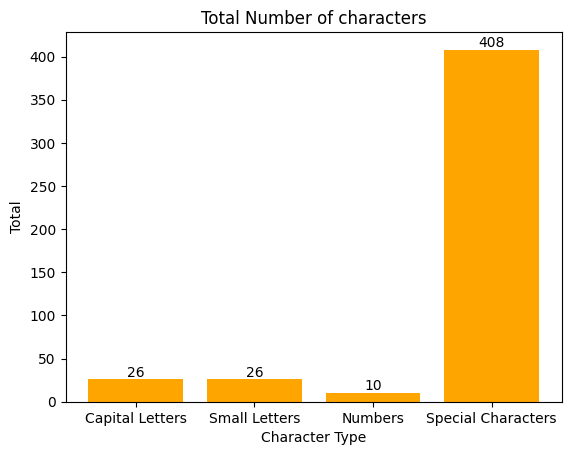

In [11]:
fig, ax = plt.subplots()
characters = ["Capital Letters", "Small Letters", "Numbers", "Special Characters"]
counts = [len(capital_letters), len(small_letters), len(numbers), len(special_characters)]
bar = ax.bar(characters, counts, color='orange')
ax.bar_label(bar)
ax.set_ylabel('Total')
ax.set_xlabel('Character Type')
ax.set_title('Total Number of characters')

plt.show()

# Feature seperation and Splitting the DataFrame into Test and Train data

In [12]:
#Feature and Label seperation
y=data['labels']
X=data.drop(['names','labels'],axis=1)
# Splitting the test and train data
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)


# Data Visualization

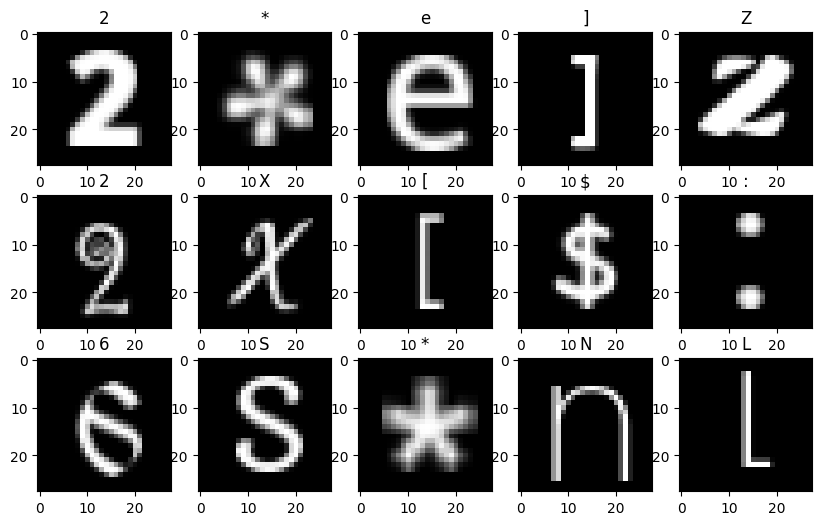

In [13]:
#Data Viz
plt.figure(figsize=(10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.title(Y_train.iloc[i])
  # Converting 1d to 2d array using reshape
  plt.imshow(X_train.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))

plt.show()

# Plotting Class distribution for Training Data

Text(0, 0.5, 'Count')

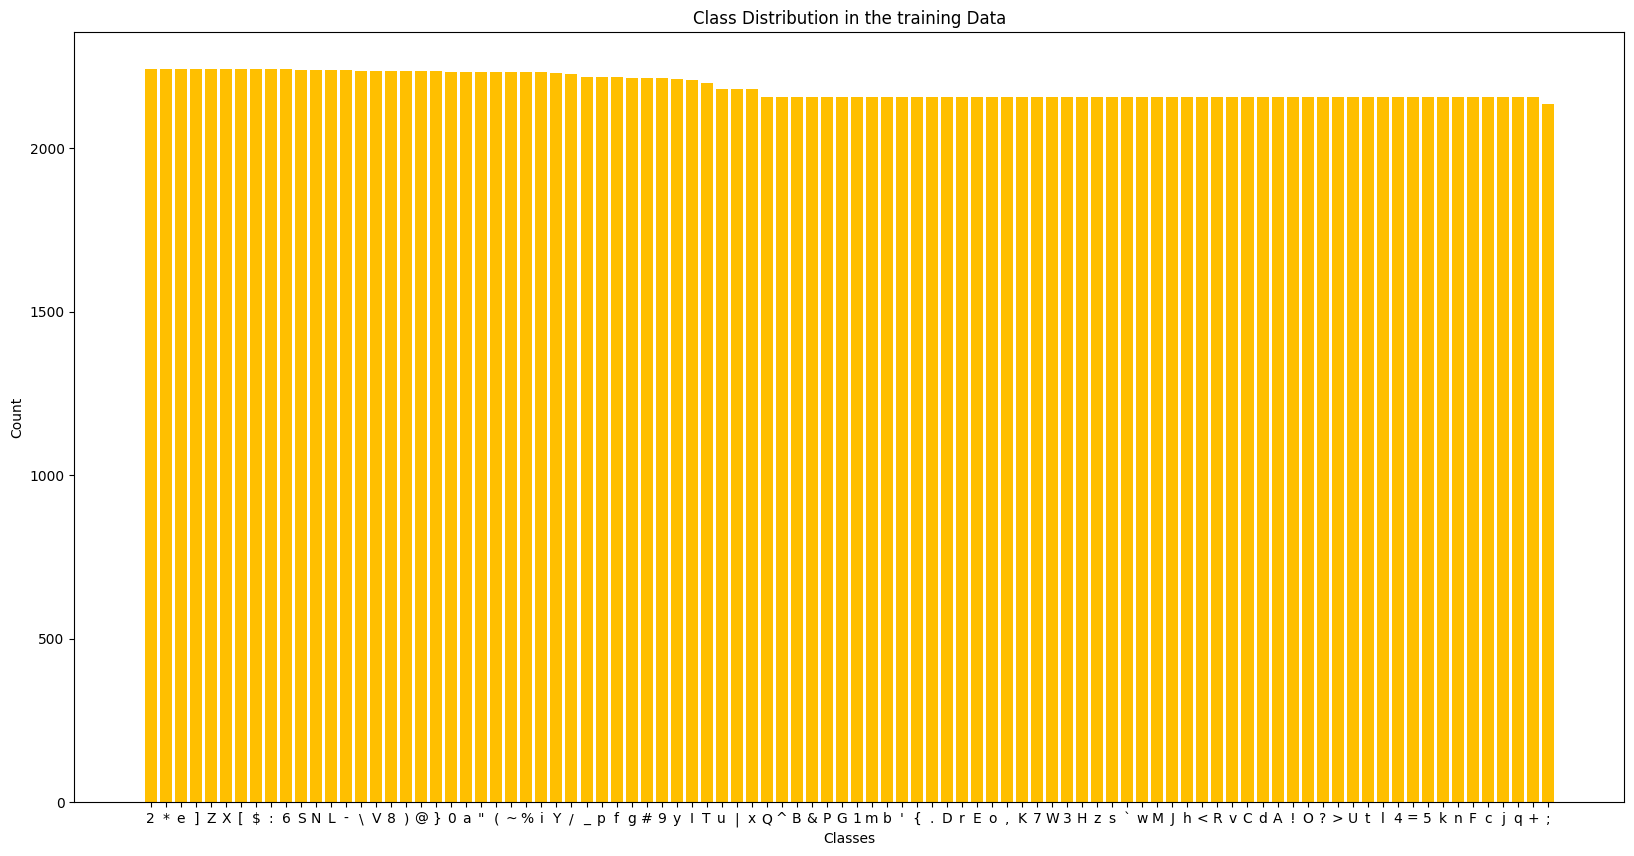

In [14]:
#Plotting class distribution in Training Data
plt.figure(figsize=(20, 10))
plt.bar(Y_train.unique(),Y_train.value_counts(),color='#FFBF00')
plt.title('Class Distribution in the training Data')
plt.xlabel('Classes')
plt.ylabel('Count')

# Plotting Class distribution for Testing Data

Text(0, 0.5, 'Count')

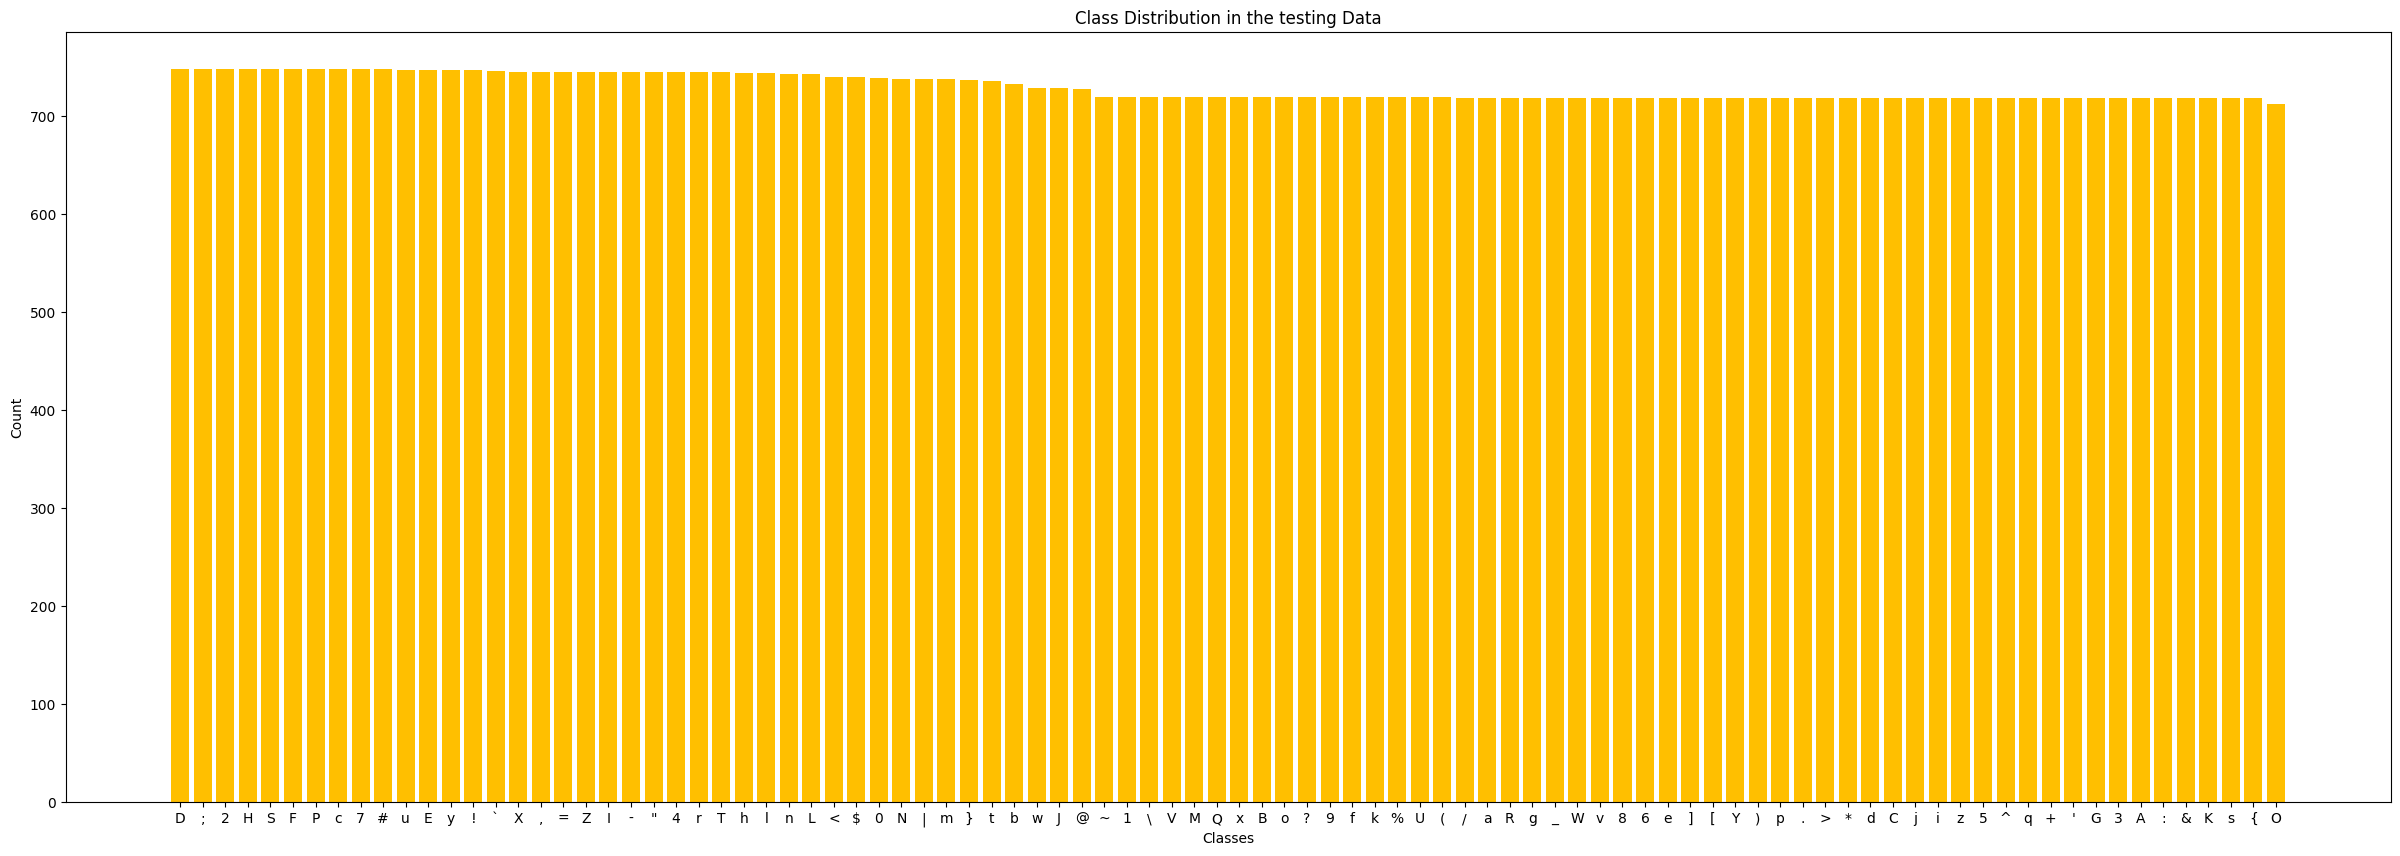

In [15]:
#Plotting class distribution in Test Data
plt.figure(figsize=(30, 10))
plt.bar(Y_test.unique(),Y_test.value_counts(),color='#FFBF00')
plt.title('Class Distribution in the testing Data')
plt.xlabel('Classes')
plt.ylabel('Count')

# Normalization

In [16]:
#Normalization
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

# One hot Encoding

In [17]:
#One Hot Encoding
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(Y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(Y_test.values.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Reshaping the input data arrays

In [18]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

# Building the Neural Network

In [19]:
#Building the Neural Network
output_layer = data['labels'].nunique()
model = tf.keras.models.Sequential()
# Input Layer
model.add(Flatten(input_shape=(28,28)))
# Adding 3 Hidden Layers with length 512, 128 and 32 respectively
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
# Output Layer. Since there are 94 characters
model.add(Dense(94, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compiling the model

In [20]:
#Compile the model
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 94)             │         3,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,814 (1.81 MB)

 Trainable params: 474,814 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

# Fitting the model

Breakdown of the parameters:

**X_train_norm:** The input features (training data) after normalization and reshaping.\

**y_train_encoded:** The target labels for the training data, likely encoded using one-hot encoding.

**epochs=20:** The number of training epochs, which is set to 20. An epoch is one complete pass through the entire training dataset.

**validation_data=(X_test_norm, y_test_encoded):** Optional validation data to evaluate the model's performance on a separate dataset after each epoch. Here, it uses the test data (X_test_norm) and corresponding labels (y_test_encoded) for validation.

**verbose=2:** Controls the verbosity of the training process. It specifies how much information about the training progress should be printed during training. Setting verbose to 2 means that progress bars will be displayed, indicating the progress of each epoch.

**batch_size=32:** The number of samples per gradient update. It defines the size of mini-batches used during training. In this case, each mini-batch consists of 32 samples.


In [21]:
#Fitting the model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=32)

Epoch 1/20


I0000 00:00:1712692269.886717      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712692269.902146      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712692281.945150      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6425/6425 - 18s - 3ms/step - accuracy: 0.8066 - loss: 0.6839 - val_accuracy: 0.8546 - val_loss: 0.4648
Epoch 2/20


W0000 00:00:1712692285.272777      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6425/6425 - 13s - 2ms/step - accuracy: 0.8683 - loss: 0.4110 - val_accuracy: 0.8742 - val_loss: 0.3940
Epoch 3/20
6425/6425 - 13s - 2ms/step - accuracy: 0.8833 - loss: 0.3512 - val_accuracy: 0.8805 - val_loss: 0.3680
Epoch 4/20
6425/6425 - 13s - 2ms/step - accuracy: 0.8938 - loss: 0.3131 - val_accuracy: 0.8891 - val_loss: 0.3539
Epoch 5/20
6425/6425 - 13s - 2ms/step - accuracy: 0.9019 - loss: 0.2872 - val_accuracy: 0.8938 - val_loss: 0.3446
Epoch 6/20
6425/6425 - 13s - 2ms/step - accuracy: 0.9084 - loss: 0.2664 - val_accuracy: 0.8911 - val_loss: 0.3541
Epoch 7/20
6425/6425 - 13s - 2ms/step - accuracy: 0.9145 - loss: 0.2484 - val_accuracy: 0.8958 - val_loss: 0.3443
Epoch 8/20
6425/6425 - 13s - 2ms/step - accuracy: 0.9184 - loss: 0.2341 - val_accuracy: 0.8956 - val_loss: 0.3609
Epoch 9/20
6425/6425 - 13s - 2ms/step - accuracy: 0.9212 - loss: 0.2232 - val_accuracy: 0.9045 - val_loss: 0.3436
Epoch 10/20
6425/6425 - 13s - 2ms/step - accuracy: 0.9243 - loss: 0.2157 - val_accuracy: 0.8976 - v

From the above output, we can see that the accuracy is 94%

# Plotting validation accuracy and loss as a graph

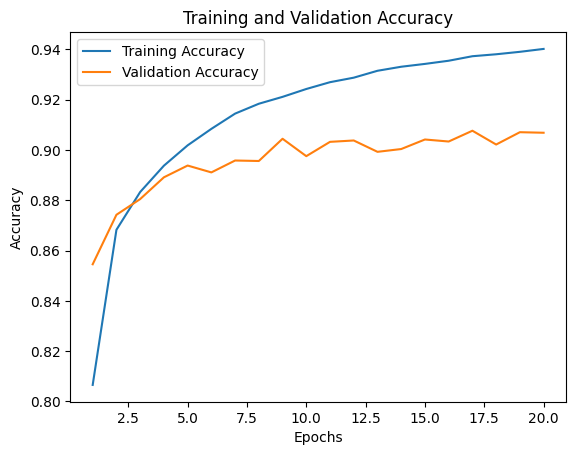

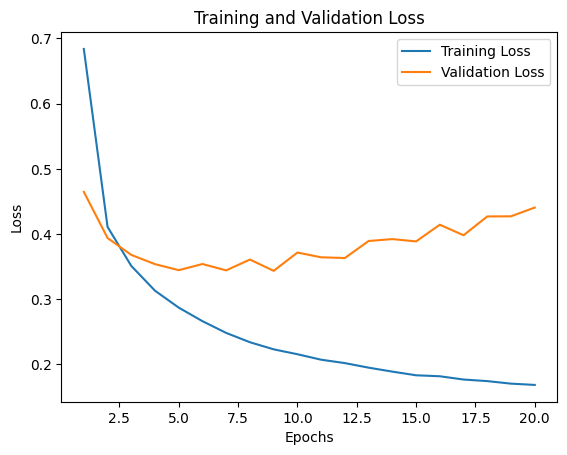

In [22]:
import matplotlib.pyplot as plt

# Access data from training history
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Increasing accuracy

In the below step, I am attempting to define a convolutional neural network (CNN) using TensorFlow's Keras API to increase accuracy on the image classification task  using the MNIST dataset. 

These are the below components which are fundamental building blocks in designing convolutional neural networks (CNNs) for tasks such as image classification. Breakdown is as follows:

**ReLU (Rectified Linear Unit):**

ReLU is an activation function commonly used in neural networks. ReLU helps introduce non-linearity to the network, allowing it to learn complex patterns in the data.

**Softmax:**

Softmax is an activation function often used in the output layer of a classification neural network.It transforms the raw output scores of the network into probabilities. It ensures that the output values lie between 0 and 1 and sum up to 1, making them interpretable as probabilities.

**Conv2D (2D Convolutional Layer):**

Conv2D is a convolutional layer used for processing spatial data, such as images.
It applies a set of learnable filters to an input image to extract features.
The filters slide over the input image and perform element-wise multiplication and summation, producing feature maps. The (5, 5) or (3, 3) specifies the size of the filters. The 128 or 64 specifies the number of filters in the layer.

**MaxPooling2D (2D Max Pooling Layer):**

MaxPooling2D is a pooling layer used for downsampling feature maps obtained from convolutional layers.It reduces the spatial dimensions of the feature maps while retaining important information.It slides a window over the input feature map and selects the maximum value within each window.The (2, 2) specifies the size of the pooling window.

**Flatten:**

Flatten is a layer used to flatten the multi-dimensional output from the convolutional and pooling layers into a one-dimensional vector. It prepares the data for input into fully connected layers.

**Dense (Fully Connected Layer):**

Dense is a fully connected layer in a neural network where each neuron is connected to every neuron in the previous layer. It performs a linear operation followed by an activation function (such as ReLU). The 64, 32, or 94 specifies the number of neurons in the layer.

In [23]:
#Trying to increase accuracy
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
conv_model = tf.keras.models.Sequential()
conv_model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
conv_model.add(MaxPooling2D((2, 2)))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPooling2D((2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(32, activation='relu'))
conv_model.add(Dense(94, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Compiling the model

In [24]:
#Compiling
conv_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 94)             │         3,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,766 (721.74 KB)

 Trainable params: 184,766 (721.74 KB)

 Non-trainable params: 0 (0.00 B)

# Fitting the model

In [25]:
#Fitting the model
conv_history=conv_model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=32)

Epoch 1/20


W0000 00:00:1712692541.581982      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712692558.771852      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6425/6425 - 25s - 4ms/step - accuracy: 0.8380 - loss: 0.5641 - val_accuracy: 0.9049 - val_loss: 0.3246
Epoch 2/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9137 - loss: 0.2807 - val_accuracy: 0.9173 - val_loss: 0.2749
Epoch 3/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9269 - loss: 0.2310 - val_accuracy: 0.9296 - val_loss: 0.2295
Epoch 4/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9329 - loss: 0.2054 - val_accuracy: 0.9292 - val_loss: 0.2277
Epoch 5/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9385 - loss: 0.1865 - val_accuracy: 0.9339 - val_loss: 0.2169
Epoch 6/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9403 - loss: 0.1742 - val_accuracy: 0.9331 - val_loss: 0.2217
Epoch 7/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9441 - loss: 0.1628 - val_accuracy: 0.9327 - val_loss: 0.2240
Epoch 8/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9471 - loss: 0.1534 - val_accuracy: 0.9348 - val_loss: 0.2249
Epoch 9/20
6425/6425 - 18s - 3ms/step - accuracy: 0.9484 - loss: 0.1473 - val_accuracy: 0.9326 - va

# Plotting the Validation accuracy and loss as a graph

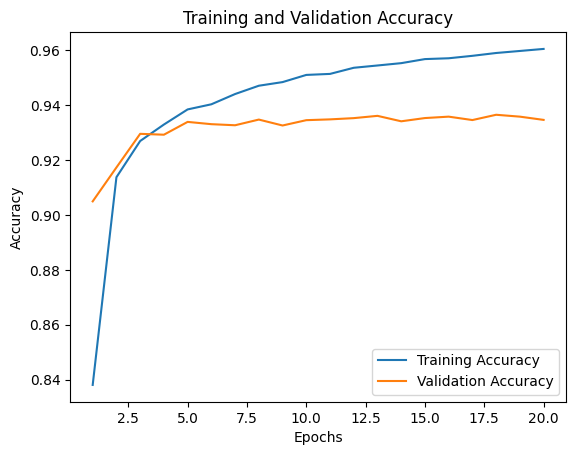

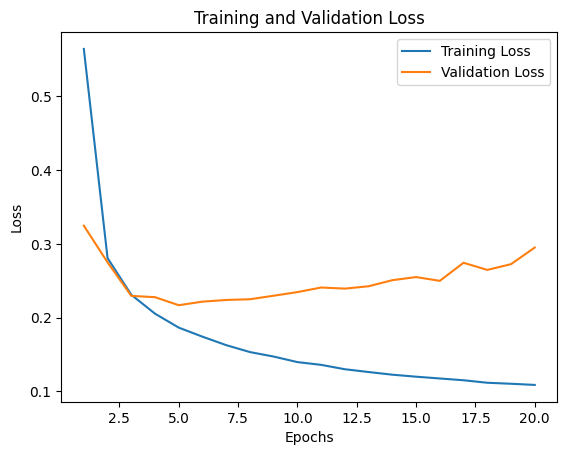

In [26]:
import matplotlib.pyplot as plt

# Access data from training history
acc = conv_history.history['accuracy']
val_acc = conv_history.history['val_accuracy']
loss = conv_history.history['loss']
val_loss = conv_history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


As compared to the first run, we can see an increase in accuracy from 94.02% to 96.05% for Training and increase in accuracy from  90.6% to 93.4% for Validation

**REFERENCES:**
1) Many techniques used in this notebook have been adapted from the following github repository:
Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool
Author name - Prof Nik Bear Brown

2) Dataset: https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/

3) Took refrence from ChaptGPT for understanding some of the syntaxes and for corrections.


**MIT License**

**Copyright (c) 2024: lakshmi14k**

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

**THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.**